## Ridge Regression

In [3]:
import gzip
import pandas as pd
import goslate
import json
import requests

import nltk
import string
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn import linear_model
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data_places = []
data_reviews = []
with gzip.open('google_local/places.clean.json.gz') as f:
    for l in f:
        data_places.append(eval(l))

In [5]:
len(data_places), data_places[:1]

(3114353,
 [{'name': 'Diamond Valley Lake Marina',
   'price': None,
   'address': ['2615 Angler Ave', 'Hemet, CA 92545'],
   'hours': [['Monday', [['6:30 am--4:15 pm']]],
    ['Tuesday', [['6:30 am--4:15 pm']]],
    ['Wednesday', [['6:30 am--4:15 pm']], 1],
    ['Thursday', [['6:30 am--4:15 pm']]],
    ['Friday', [['6:30 am--4:15 pm']]],
    ['Saturday', [['6:30 am--4:15 pm']]],
    ['Sunday', [['6:30 am--4:15 pm']]]],
   'phone': '(951) 926-7201',
   'closed': False,
   'gPlusPlaceId': '104699454385822125632',
   'gps': [33.703804, -117.003209]}])

In [6]:
N = 4000000
data_reviews = []
with gzip.open('google_local/reviews.clean.json.gz') as f:
    head = [next(f) for x in range(N)]
    for l in head:
        data_reviews.append(eval(l))

In [7]:
data_reviews[:1]

[{'rating': 3.0,
  'reviewerName': 'an lam',
  'reviewText': 'Chất lượng tạm ổn',
  'categories': ['Giải Trí - Café'],
  'gPlusPlaceId': '108103314380004200232',
  'unixReviewTime': 1372686659,
  'reviewTime': 'Jul 1, 2013',
  'gPlusUserId': '100000010817154263736'}]

In [8]:
df_data_reviews = pd.DataFrame.from_dict(data_reviews)

In [9]:
df_data_reviews[:5]

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId
0,3.0,an lam,Chất lượng tạm ổn,[Giải Trí - Café],108103314380004200232,1.372687e+09,"Jul 1, 2013",100000010817154263736
1,5.0,HALİL TURGUT,Wc si temiz duzenli..,[Turkish Cuisine],102194128241608748649,1.342871e+09,"Jul 21, 2012",100000013500285534661
2,5.0,森田さとこ,何回も私は予定に休みがセルバに行ったので覚えて見て、分かります❗,"[Fishing, Pond Fish Supplier, Seafood Market]",101409858828175402384,1.390654e+09,"Jan 25, 2014",100000021336848867366
3,5.0,森田さとこ,今度は予定に休みが登米市に行きたい❗☀😅🌌 楽しいに日帰りに登米の見学の観光(*^)(*^-...,[Museum],101477177500158511502,1.389188e+09,"Jan 8, 2014",100000021336848867366
4,4.0,森田さとこ,気仙沼警察署に移転中に絆 👮🐎☺🙋🚓頑張ろう❗,[Police],106994170641063333085,1.390486e+09,"Jan 23, 2014",100000021336848867366


In [10]:
len(df_data_reviews)

4000000

In [11]:
df_reviews = df_data_reviews.dropna()

In [12]:
len(df_reviews), df_reviews.iloc[2536747]

(2581631, rating                                                            1
 reviewerName                                     Abhijeet Dhamankar
 reviewText        The store manager is extremely rude and has th...
 categories            [Shipping and Mailing, Copy Shop, Print Shop]
 gPlusPlaceId                                  100220547269290934702
 unixReviewTime                                          1.38877e+09
 reviewTime                                              Jan 3, 2014
 gPlusUserId                                   106276733271811926636
 Name: 3930500, dtype: object)

In [13]:
#reviews_data = df_reviews.T.to_dict().values()

### Function - Filtering out data based on GPS coordinates

In [14]:
def places_filter(dataset, lat_l, lat_h, lon_l, lon_h):
    reviews_us = []
    for d in dataset:
        if (d['gps'] != None and d['price'] != None and d['price'] != ''):
            if ((d['gps'][0] >= lat_l) \
              & (d['gps'][0] <= lat_h) \
             & (d['gps'][1] >= lon_l) \
            & (d['gps'][1] <= lon_h)):
                reviews_us.append(d)
    return reviews_us 

In [15]:
places_ca = places_filter(data_places, 32.32, 42, -124.26,-114.8)

In [16]:
len(places_ca), len(data_reviews)

(48865, 4000000)

In [17]:
### Function - Filter data based on 

In [18]:
def joined_data(places, reviews):
    placeGPS = defaultdict(list)
    placePrice = defaultdict(list)
    joined_data = []

    for d in places:
        placeGPS[d['gPlusPlaceId']] = d['gps'] 
        placePrice[d['gPlusPlaceId']] = d['price']
    #print(placeGPS)
    # dataset is reviews data
    for d in reviews:
        
        if d['gPlusPlaceId'] in placeGPS:
            d['gps'] = placeGPS[d['gPlusPlaceId']]
            d['price'] = placePrice[d['gPlusPlaceId']]
            joined_data.append(d)
    return (joined_data)

In [19]:
data_ca = joined_data(places_ca, data_reviews)

In [20]:
len(data_ca)

125947

In [21]:
data_ca[:1]

[{'rating': 4.0,
  'reviewerName': 'william spindler',
  'reviewText': 'Best War Wanton soup in Red Bluff',
  'categories': ['Asian Restaurant', 'Chinese Restaurant'],
  'gPlusPlaceId': '106591714648856494903',
  'unixReviewTime': 1394669496,
  'reviewTime': 'Mar 12, 2014',
  'gPlusUserId': '100000032416892623125',
  'gps': [40.179159, -122.236162],
  'price': '$$$'}]

In [22]:
data_ca_ = []
for d in data_ca:
    if (d['gps'] != None and d['gps'] != '' \
        and d['price'] != None and d['price'] != '' \
        and d['reviewText'] != None and d['reviewText'] != '' \
        and d['categories'] != None and d['categories'] != '' \
        and d['rating'] != None and d['rating'] != ''):
        data_ca_.append(d)

In [23]:
len(data_ca_)

76254

In [24]:
sum(d['categories'] == None for d in data_ca_)
#[d for d in data_ca if d['categories'] == None]

0

In [25]:
categ_list = []
placeCateg = defaultdict(list)
count=0
for d in data_ca_:
    for l in d['categories']:
            if l not in categ_list:
                categ_list.append(l)

len(categ_list), #categ_list

(847,)

In [26]:
categ_list[:2]

['Asian Restaurant', 'Chinese Restaurant']

In [27]:
perCategReviews = defaultdict(int)
for c in categ_list:
    for d in data_ca_:    
        if d['categories'] != None:
            if c in d['categories']:
                perCategReviews[c]+=1

In [28]:
top_categ = []
for d in perCategReviews:
    item = (perCategReviews[d], d)
    top_categ.append(item)
    
sorted(top_categ, reverse=True)[:10]

[(12108, 'American Restaurant'),
 (10423, 'Asian Restaurant'),
 (7837, 'European Restaurant'),
 (7370, 'Restaurant'),
 (7291, 'Fast Food Restaurant'),
 (6923, 'Mexican Restaurant'),
 (6484, 'Latin American Restaurant'),
 (6387, 'Italian Restaurant'),
 (5223, 'Pizza Restaurant'),
 (4795, 'Hamburger Restaurant')]

In [29]:
df_ca = pd.DataFrame.from_dict(data_ca_)

In [30]:
df_ca[:5]

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,gps,price
0,4.0,william spindler,Best War Wanton soup in Red Bluff,"[Asian Restaurant, Chinese Restaurant]",106591714648856494903,1394669496,"Mar 12, 2014",100000032416892623125,"[40.179159, -122.236162]",$$$
1,5.0,william spindler,This is a review that is long overdo. I've bee...,"[European Restaurant, Italian Restaurant, Pizz...",109420033090810328045,1394826388,"Mar 14, 2014",100000032416892623125,"[40.178074, -122.235234]",$$
2,5.0,william spindler,"Long time favorite Mexican food, always consis...",[Mexican Restaurant],115827996910815192564,1394669713,"Mar 12, 2014",100000032416892623125,"[40.175064, -122.242574]",$$
3,5.0,Anne Mason,Great coffee and location! Check out the used ...,"[Espresso Bar, Coffee Shop]",108196901293702895067,1379187049,"Sep 14, 2013",100000106576186066497,"[38.030536, -121.884024]",$$$
4,5.0,Anne Mason,"I've been here dozens of times, and I'll keep ...","[Sushi Restaurant, Asian Restaurant, Japanese ...",111971088396054239194,1394848761,"Mar 14, 2014",100000106576186066497,"[37.961078, -121.748886]",$$


In [31]:
df_ca['unixReviewTime'].shape

(76254,)

In [32]:
df_ca['dtime'] = pd.to_datetime(df_ca['unixReviewTime'],unit='s')
#df_ca['dt'] = datetime(df_ca['unixReview'])
df_ca['hour'] = df_ca.dtime.dt.hour
df_ca['minute'] = df_ca.dtime.dt.minute
df_ca['second'] = df_ca.dtime.dt.second

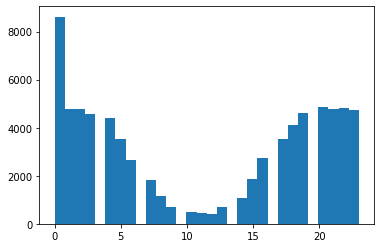

In [33]:
plt.hist(df_ca['hour'], bins = 30)
plt.show()

In [34]:
review_count =  pd.DataFrame(df_ca['hour'].value_counts())
review_count['hr'] = review_count.index
review_count.reset_index
review_count = review_count.rename(columns={"hour": "num_reviews"}).sort_values(by=['hr'])
#review_count

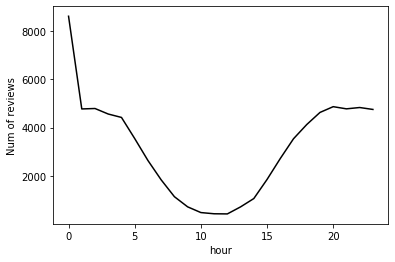

In [35]:
plt.plot((review_count['hr']), review_count['num_reviews'], color = 'black') 
plt.xlabel('hour')
plt.ylabel('Num of reviews')
#plt.legend()
plt.show()

#### Write to csv df_ca

In [36]:
df_ca.to_csv('df_ca.csv', index=True)

### Text Analysis

In [37]:
df_ca.isnull().values.any()

False

In [38]:
df_ca['reviewText'].isnull().values.any()

False

In [39]:
wordCount = defaultdict(int)
totalWords = 0
punct = string.punctuation
stemmer = PorterStemmer()

In [40]:
sw = stopwords.words('english')

In [41]:
for d in data_ca_:
    
    t = d['reviewText']
    t = t.lower() # lowercase string
    t = [c for c in t if not (c in punct)] # non-punct characters
    t = ''.join(t) # convert back to string
    words = t.strip().split() # tokenizes
    for w in words:
        if w not in sw:
            #w = stemmer.stem(w)
            #print(w)
            totalWords += 1
            wordCount[w] += 1

In [42]:
totalWords

1623179

In [43]:
len(wordCount)

60413

In [44]:
words = [(wordCount[w],w) for w in wordCount]

In [45]:
words.sort()
words.reverse()

In [46]:
word_feat = [w[1] for w in words[:2000]]

In [47]:
wordId = dict(zip(word_feat, range(len(word_feat))))
wordSet = set(word_feat)

In [48]:
wordId['also']

26

### Data split

In [49]:
#random.shuffle(data_ca_)
tr_len = round(0.8*len(data_ca_))
va_len = round(0.1*len(data_ca_))
te_len = round(0.1*len(data_ca_))

tr_01 = data_ca_[0:tr_len]
va_01 = data_ca_[tr_len:tr_len + va_len]
te_01 = data_ca_[tr_len+va_len:]

len(tr_01), len(va_01), len(te_01)

(61003, 7625, 7626)

### Training Regressor 01

In [50]:
def feature(datum):
    feat = [0]*len(wordSet)
    t = datum['reviewText']
    t = t.lower() # lowercase string
    t = [c for c in t if not (c in punct)] # non-punct characters
    t = ''.join(t) # convert back to string
    words = t.strip().split() # tokenizes
    for w in words:
        if not (w in wordSet): continue
        feat[wordId[w]] += 1
    feat.append(1)
    return feat

In [51]:
X = [feature(d) for d in tr_01]
y = [d['rating'] for d in tr_01]
len(X), len(y)

(61003, 61003)

In [52]:
clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
clf.fit(X, y)
theta = clf.coef_
pred = clf.predict(X)

#### Function - MSE

In [53]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [54]:
pred[:5]

array([4.26462951, 4.43617136, 4.49988074, 3.84048333, 3.78726344])

In [55]:
X_va_01 = [feature(d) for d in va_01]
y_va_01 = [d['rating'] for d in va_01]

X_te_01 = [feature(d) for d in te_01]
y_te_01 = [d['rating'] for d in te_01]

pred_va_01 = clf.predict(X_va_01)
pred_te_01 = clf.predict(X_te_01)

MSE(pred, y), MSE(pred_va_01, y_va_01), MSE(pred_te_01, y_te_01)

(0.7998458304860848, 0.8904528894048964, 0.8487307660280751)

In [56]:
#words[9000:20000]

In [63]:
top_words_len = [(x+500) for x in range(500,3000,500)]
top_words_len

[1000, 1500, 2000, 2500, 3000]

In [66]:
#top_words_len = [(x+.5)*1000 for x in range(2)]
mse_by_top_words = []
for l in top_words_len:
    
    word_feat = [w[1] for w in words[:l]]
    wordId = dict(zip(word_feat, range(len(word_feat))))
    wordSet = set(word_feat)
    
    X = [feature(d) for d in tr_01]
    #y = [d['rating'] for d in tr_01]
    
    clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
    clf.fit(X, y)
    theta = clf.coef_
    pred = clf.predict(X)
    
    X_va_01 = [feature(d) for d in va_01]
    #y_va_01 = [d['rating'] for d in va_01]

    X_te_01 = [feature(d) for d in te_01]
    #y_te_01 = [d['rating'] for d in te_01]
    
    pred_va_01 = clf.predict(X_va_01)
    pred_te_01 = clf.predict(X_te_01)
    
    print(l)

    mse_by_top_words.append((MSE(pred, y), MSE(pred_va_01, y_va_01), MSE(pred_te_01, y_te_01)))

1000
1500
2000
2500
3000


In [67]:
mse_by_top_words

[(0.8449665591826176, 0.8889033711275022, 0.8539993216648604),
 (0.8216157681967183, 0.8881152929238086, 0.8506935344770881),
 (0.7998458304860848, 0.8904528894048964, 0.8487307660280751),
 (0.7848065529664382, 0.9032840510192416, 0.8536497256862275),
 (0.7712448592171647, 0.9158397883089372, 0.8581608939461068)]

**Insight**

As the number of popular words increases to build the feature vector, the training error increases. We have minimum validation MSE at N = 1500. This can further be optimized by adding each popular word by step size = 1.